In [9]:
# Importando Bibliotecas

# Manipulação dos Dados
import pandas as pd

# Visualização dos Dados
import matplotlib.pyplot as plt
import matplotlib as m
import seaborn as sns

# Análise e modelagem das séries Temporáis
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.stattools import adfuller

In [10]:
# Formatação dos gráficos e tabelas
plt.style.use('ggplot')
pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [11]:
# Formatando os labels dos gráficos
m.rcParams['axes.labelsize'] =14
m.rcParams['xtick.labelsize'] = 12
m.rcParams['ytick.labelsize'] = 12
m.rcParams['text.color'] = 'k'

### Carregando os Dados

In [12]:
# Carrega os dados
dados = pd.read_csv(r'C:\Users\user\Documents\website_user_forecasting\data\dataset.csv', header=None)

In [13]:
# Ajustando o nome de cada coluna
dados.columns =['mes', 'usuarios_ativos']

In [14]:
# Convertendo a coluna data em de object para date time
dados['mes'] = pd.to_datetime(dados['mes'], format='%Y-%m')

In [15]:
# Transformando a coluna de data no índice do conjunto de dados
dados_serie = dados.set_index('mes')

In [16]:
# Visualizando o Dataset
dados_serie.head()

,usuarios_ativos
mes,
2013-01-01,110
2013-02-01,121
2013-03-01,135
2013-04-01,127
2013-05-01,128


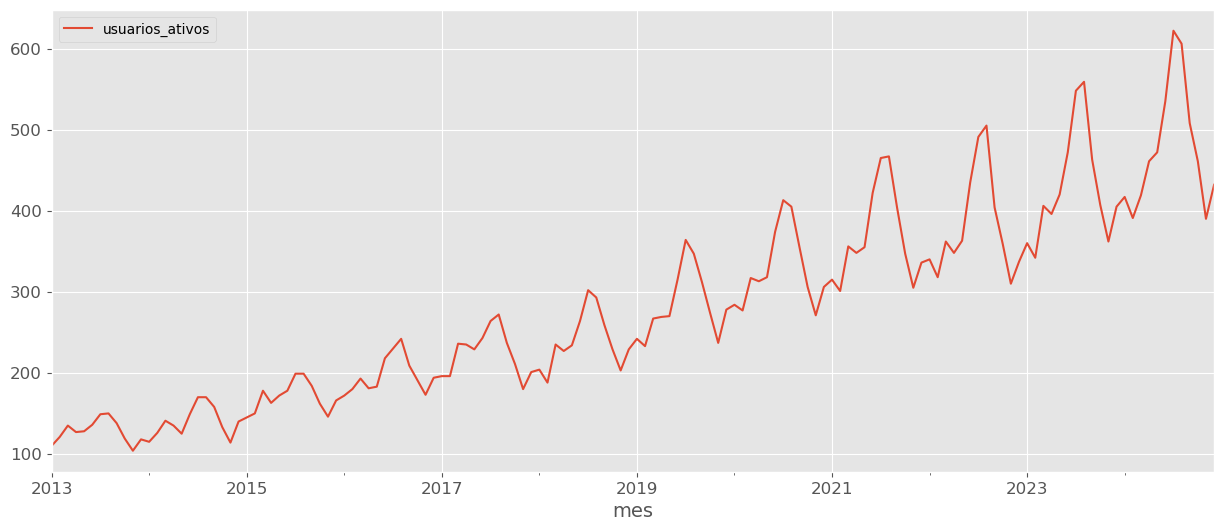

In [17]:
# Plot da serie temporal
dados_serie.plot(figsize= (15, 6))
plt.show()

O gráfico acima mostra 2 componentes da série: Sazonalidade e Tendência.

- Sazonalidade - o fenômeno se repete em períodos fixos.

- Tendência - ao longo do tempo, a série segue uma tendência de crescimento.

### Propriedades Estatísticas de Séries Temporais

Antes de iniciar qualquer modelagem preditiva em séries temporais é necessário verificar se essas propriedades estatísticas são constantes na série temporal:

- **Estacionariedade**: a série temporal **deve** ser estacionária, ou seja, suas características estatísticas, como média e variância, não mudam ao longo do tempo.


- **Não-autocorrelação**: as observações da série temporal não devem ser fortemente correlacionadas com observações anteriores.


- **Normalidade**: é frequentemente pressuposto que as observações da série temporal são distribuídas normalmente (seguem uma distribuição normal).

### Plot das Rolling Statistics (Estatísticas Móveis)

As estatísticas móveis, também conhecidas como estatísticas rolantes ou estatísticas deslizantes, são uma técnica usada na análise de séries temporais para calcular estatísticas, como média, mediana, soma, variância e desvio padrão, em uma janela deslizante de tamanho fixo ao longo da série. A ideia é analisar e entender as mudanças nas estatísticas locais ao longo do tempo, o que pode ajudar a identificar tendências, sazonalidade, pontos de mudança e outras características dos dados.

Para calcular estatísticas móveis, você define uma janela de tamanho 'n' (onde n é um número inteiro) e move a janela ao longo da série temporal, calculando a estatística desejada para cada subconjunto de dados dentro da janela. A janela avança uma observação de cada vez e o cálculo é repetido até que a janela alcance o final da série.

Por exemplo, para calcular a média móvel de uma série temporal, você seleciona uma janela de tamanho n e calcula a média dos valores dentro da janela. Em seguida, a janela é deslocada uma posição à frente e a média é recalculada para os novos valores na janela. Esse processo é repetido até que a janela atinja o final da série temporal.

In [18]:
type(dados)

pandas.core.frame.DataFrame

In [19]:
# Deteminando estatísticas móveis
rolmean = dados['usuarios_ativos'].rolling(window = 12).mean()
rolstd = dados['usuarios_ativos'].rolling(window = 12).std()

In [20]:
# Prepara os dados para o plot
x = dados['mes'].values
y = dados['usuarios_ativos'].values

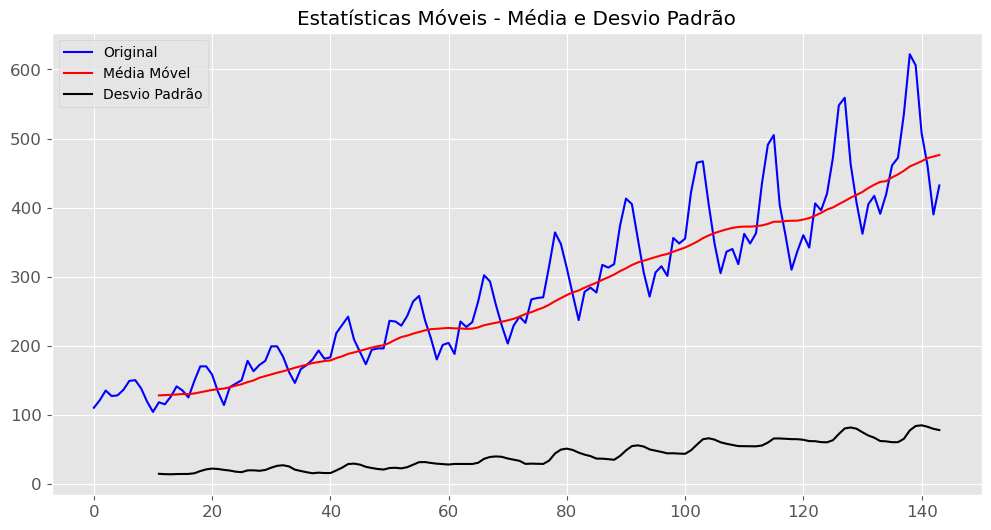

In [21]:
# Plot das estastísticas móveis
plt.figure(figsize = (12, 6))
orig = plt.plot(y, color = 'blue', label = 'Original')
mean = plt.plot(rolmean, color = 'red', label = 'Média Móvel')
std = plt.plot(rolstd, color = 'black', label = 'Desvio Padrão')
plt.legend(loc='best')
plt.title('Estatísticas Móveis - Média e Desvio Padrão')
plt.show()

**Análise**:
* Observamos que a média móvel e o desvio padrão não são consgantes em relação ao tempo (tendência crescente).
* A série não é, estacionária.

### Plots da Função de Autocorrelação (ACF) e Função de Autocorrelação Parcial (PACF)

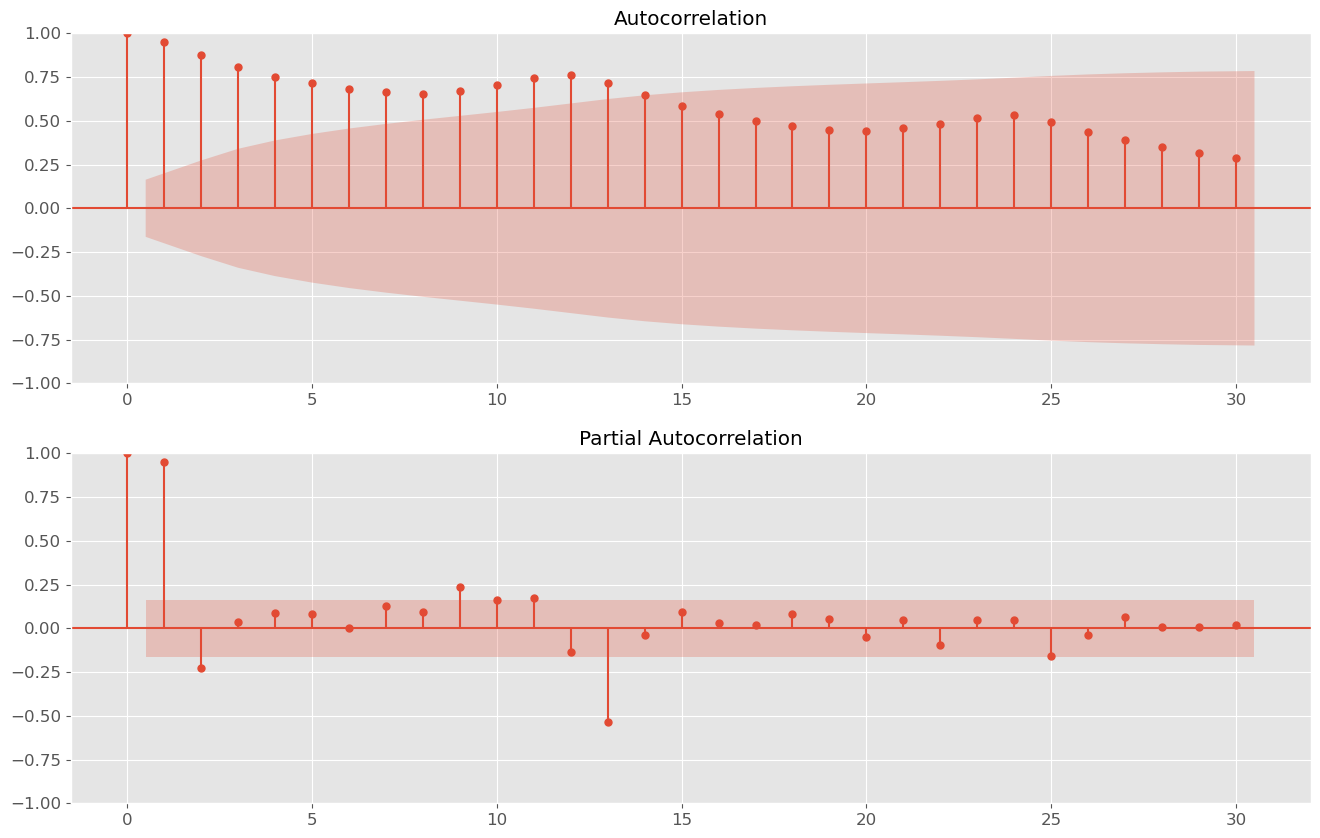

In [23]:
# Plots
plt.rcParams.update({'figure.figsize': (16,10)})

# Plot do gráfico ACF
plt.subplot(211)
plot_acf(dados_serie.usuarios_ativos, ax = plt.gca(), lags= 30)

# Plot do gráfico PACF
plt.subplot(212)
plot_pacf(dados_serie.usuarios_ativos, ax = plt.gca(), lags= 30, method='ywm')
plt.show()